In [1]:
%autosave 0

Autosave disabled


In [82]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

Dataset 
==
https://www.kaggle.com/limyunjie1999/time-series-forecasting-on-energy-consumption-data/data


Данные взяты из одного из соревнований kaggle. Это почасовая аггрегация потребления энергии. 

In [3]:
df = pd.read_csv('../datatest/AEP_hourly.csv')

In [4]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [5]:
df.sort_values(by='Datetime',inplace=True)

In [6]:
df['Datetime']

2183      2004-10-01 01:00:00
2184      2004-10-01 02:00:00
2185      2004-10-01 03:00:00
2186      2004-10-01 04:00:00
2187      2004-10-01 05:00:00
                 ...         
116157    2018-08-02 20:00:00
116158    2018-08-02 21:00:00
116159    2018-08-02 22:00:00
116160    2018-08-02 23:00:00
116161    2018-08-03 00:00:00
Name: Datetime, Length: 121273, dtype: object

У колонки **Datetime** тип **object**. Как мы и говорили ранее, его нужно преобразовать в тип **datetime**.
Для этого мы используем функцию pandas **to_datetime**:

In [7]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [8]:
df['Datetime']

2183     2004-10-01 01:00:00
2184     2004-10-01 02:00:00
2185     2004-10-01 03:00:00
2186     2004-10-01 04:00:00
2187     2004-10-01 05:00:00
                 ...        
116157   2018-08-02 20:00:00
116158   2018-08-02 21:00:00
116159   2018-08-02 22:00:00
116160   2018-08-02 23:00:00
116161   2018-08-03 00:00:00
Name: Datetime, Length: 121273, dtype: datetime64[ns]

Datetime может быть использована в качестве индекса. Для того, что поменять индекс на одну из существующих колонок, мы используем функцию **set_index**

In [9]:
df.set_index('Datetime',inplace=True)

<AxesSubplot:xlabel='Datetime'>

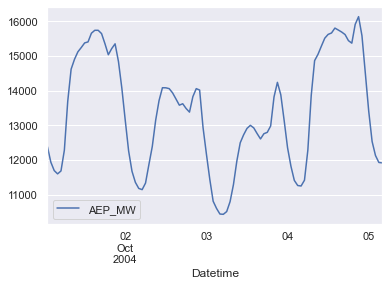

In [11]:
df[0:100].plot()

Визуализация 
===


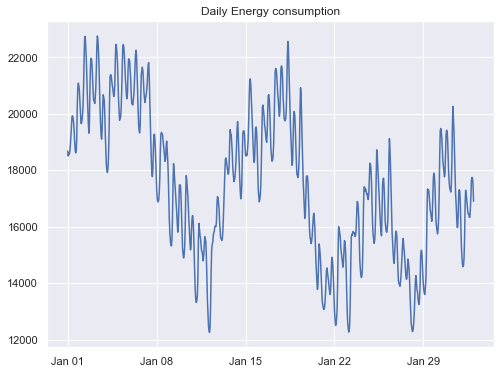

In [76]:
start = '2018-01-01'
end = '2018-02-01'
fig,ax= plt.subplots(figsize=(8,6))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax.plot(df.loc[start:end], linestyle='-')
ax.set_title('Daily Energy consumption')
plt.show()

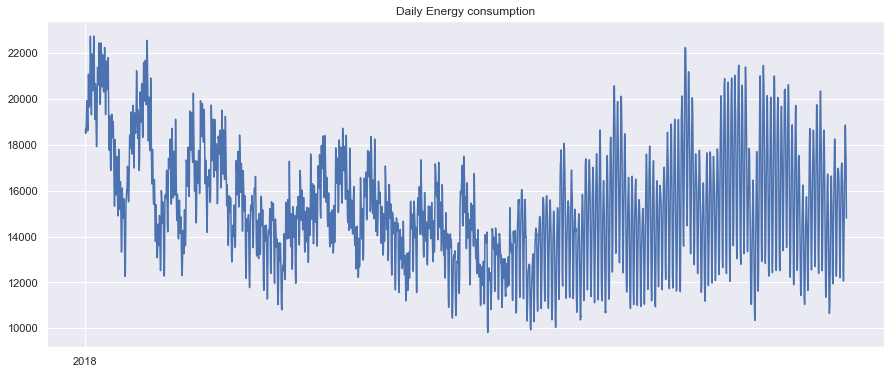

In [79]:
start = '2018-01-01'
end = '2019-01-01'
fig,ax= plt.subplots(figsize=(15,6))

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.plot(df.loc[start:end], linestyle='-')
ax.set_title('Daily Energy consumption')
plt.show()

Сезонность
==

Text(0, 0.5, 'GWh')

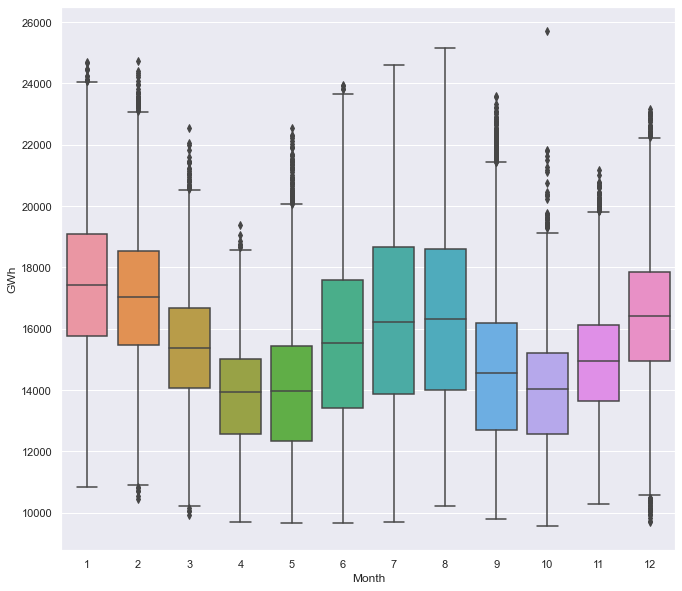

In [90]:
df['Month']=df.index.month
fig, ax = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=df,x='Month', y='AEP_MW', ax=ax)
ax.set_ylabel('GWh')


Resampling (повторная выборка)
===
Для анализа часто полезно использовать повторную выборку используя более высокие или более низкие частоты.

При использовании более низких частот обычно также применяются функции аггрегации. Например, имея данные по продажам за день, мы можем посчитать общую сумму продаж за месяц. Или, при наличии данных посещения сайта (траффик) в час, мы можем определеить среднюю посещаемость в час за день. Такой метод повторной выборки еще называется **downsampling** или **понижение разрешения**.

При повышении разрешения (**upsampling**) не так распространено, и оно включает в себя различные методы интерполяции или любы другие методы заполнения данных. Например, у нас есть почасовая выборка погодных данных и мы хотим понять, что происходить в 10-минутном интервале. 

Для использования техник resample в комбинации с Pandas, нам необходимо индексировать данные с помощью временного типа, что мы сделали выше. 

Посольку данные у нас аггрегированы по часам, мы можем сделать resampling по дням. 
В качестве agregation function мы возьмем сумму. 

**resample** метод возвращает resampler object, который похож на Groupby object. 

In [12]:
df_daily_sum = df.resample('D').sum()

In [13]:
df_daily_sum

,AEP_MW
Datetime,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0
...,...
2018-07-30,368834.0
2018-07-31,364327.0
2018-08-01,363628.0


Первая строчка содержит общее потребление энергии за 2004-10-01, вторая - за 2004-10-02 и так далее. Каждая строчка повторной выборки помечена правым значением интервала. 


Наша повторная выборка должна содержать в 24 раза меньше строк, чем изначальная, поскольку мы перешли от почасовой агрегации к дневной. 

In [14]:
print(len(df))
print(len(df_daily_sum))
print((len(df)/len(df_daily_sum)))

121273
5055
23.990702274975273


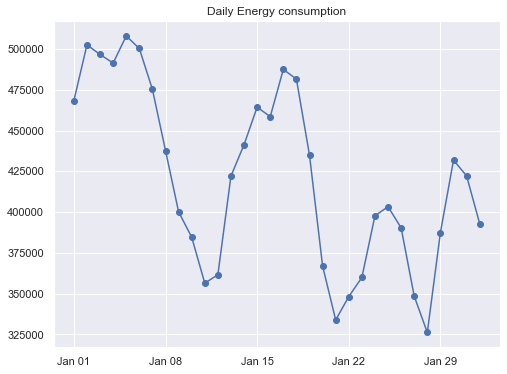

In [15]:
start = '2018-01-01'
end = '2018-02-01'
fig,ax= plt.subplots(figsize=(8,6))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax.plot(df_daily_sum.loc[start:end],marker='o', linestyle='-')
ax.set_title('Daily Energy consumption')
plt.show()

Можно также посчитать, сколько в среднем в час потребляется энергии используя функцию mean:

In [16]:
df_daily_avg = df.resample('D').mean()

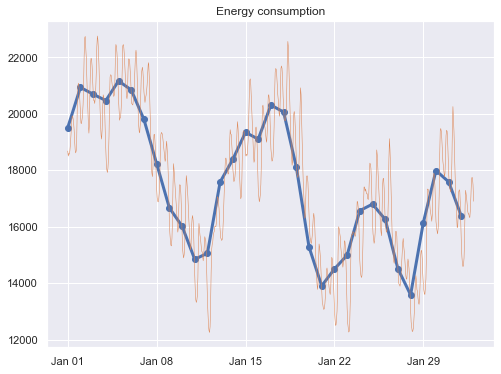

In [17]:
start = '2018-01-01'
end = '2018-02-01'
fig,ax= plt.subplots(figsize=(8,6))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax.plot(df_daily_avg.loc[start:end],marker='o', linestyle='-', linewidth=3)
ax.plot(df.loc[start:end], linestyle='-',linewidth=0.5)
ax.set_title('Energy consumption')
plt.show()

Как видно из графика, усредненная кривая более сглаженная, так как мы усреднили большую вариативность. Давайте теперь посмотрим на  значения, сгруппированные по месяцу. 

In [18]:
df_monthly = df.resample('M').sum()

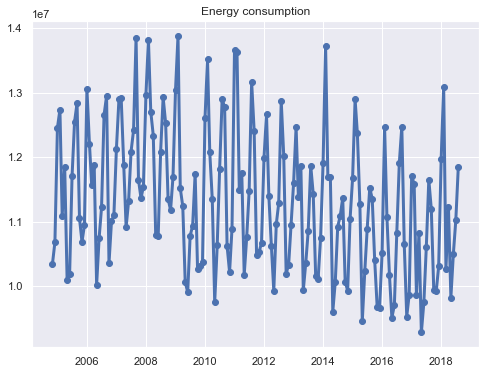

In [19]:

fig,ax= plt.subplots(figsize=(8,6))

ax.plot(df_monthly[:-1],marker='o', linestyle='-', linewidth=3)
ax.set_title('Energy consumption')
plt.show()

Rolling windows (скользящее окно)
===
Этот метод похож своим принципом на предыдущий, он также работает на определенном отрезке данных, применяя аггрегацию (среднее, минимум, максимум, сумма и так далее).Но в предыдущем методе, где временные отрезки не пересекаются, а также частота финального датафрейма ниже, чем исходного, rolling window работает на той же частоте, что и исходные данные, окна "перекрывают" друг друга. Таким образом финальнынй датафрейм или серия имеют ту же частоту, что и исходный. 


Давайте попробуем применить rolling() метод для серии с дневной частотой, посчитав среднее значение.Мы используем center=True для значений окна в его центре. 

In [24]:
df_7d = df_daily_sum.rolling(7,center=True).mean()
df_7d.head(10)

,AEP_MW
Datetime,
2004-10-01,NaN
2004-10-02,NaN
2004-10-03,NaN
2004-10-04,330991.714286
2004-10-05,333258.000000
2004-10-06,333034.000000
2004-10-07,333148.142857
2004-10-08,333116.285714
2004-10-09,333717.000000


Как мы видим, первое ненулевое значение находится на 2004-10-04 - это средина интервала. Если мы не используем center=True, то индексирование будет сделано на конец интервала

In [25]:
df_daily_sum.rolling(7).mean().head(10)

,AEP_MW
Datetime,
2004-10-01,NaN
2004-10-02,NaN
2004-10-03,NaN
2004-10-04,NaN
2004-10-05,NaN
2004-10-06,NaN
2004-10-07,330991.714286
2004-10-08,333258.000000
2004-10-09,333034.000000


Чтобы посмотреть на разницу между rolling window и resampling, давайте сделаем resampling с недельной частотой. Мы будем использовать данные с суммарным количеством потребления энергии за день (df_daily), так как мы хотим получить средне значение за неделю в день. 

In [30]:
df_weekly = df_daily_sum.resample('W').mean()

In [31]:
df_weekly

,AEP_MW
Datetime,
2004-10-03,311330.333333
2004-10-10,333148.142857
2004-10-17,339740.571429
2004-10-24,339891.000000
2004-10-31,332232.000000
...,...
2018-07-08,386854.285714
2018-07-15,399968.571429
2018-07-22,373790.428571


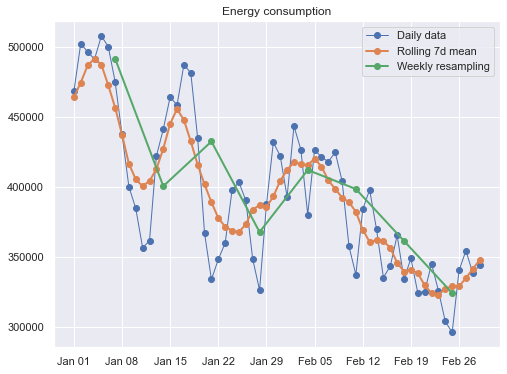

In [44]:
start = '2018-01-01'
end = '2018-03-01'
fig,ax= plt.subplots(figsize=(8,6))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax.plot(df_daily_sum.loc[start:end], marker='o',linestyle='-', linewidth=1, label='Daily data')
ax.plot(df_7d[start:end], marker='o', linestyle='-', linewidth=2, label='Rolling 7d mean')
ax.plot(df_weekly[start:end], marker='o', linestyle='-', linewidth=2, label='Weekly resampling')
ax.set_title('Energy consumption')
ax.legend()
plt.show()

Как видно из графика, daily data и rolling 7d mean имеют одинаковую частоту, но скользящее окно является сглаженным.

Тренды
===

На ряду с частотами, которые представлены шумом и сезонностью, временные ряды так же характеризуются трендами, которые являютсе медленными изменениями. Самым простым способом визуализации трендов является скользящее среднее на разных временных интервалах. 

Скользящее среднее сглаживает временной ряд. Для примера можем посчитать скользящее среднее на годовом отрезке. 

In [53]:
df_1y = df_daily_sum.rolling(365).mean(center=True,min_periods=360)

In [54]:
df_1y

,AEP_MW
Datetime,
2004-10-01,NaN
2004-10-02,NaN
2004-10-03,NaN
2004-10-04,NaN
2004-10-05,NaN
...,...
2018-07-30,359267.304110
2018-07-31,359217.819178
2018-08-01,359151.558904


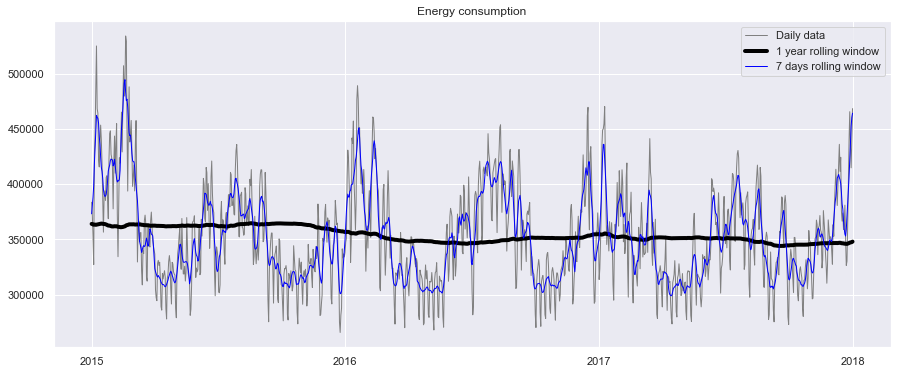

In [74]:
start = '2015-01-01'
end = '2018-01-01'
fig,ax= plt.subplots(figsize=(15,6))

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.plot(df_daily_sum.loc[start:end],linestyle='-', linewidth=1, label='Daily data',color='grey')
#ax.plot(df_7d[start:end], marker='o', linestyle='-', linewidth=2, label='Rolling 7d mean')
ax.plot(df_1y.loc[start:end], linestyle='-', linewidth=4, label='1 year rolling window',color='black')
ax.plot(df_7d.loc[start:end], linestyle='-', linewidth=1, label='7 days rolling window',color='blue')
ax.set_title('Energy consumption')
ax.legend()
plt.show()

Как мы видим на графике, скользящее среднее на размере интервала в  365 дней остается на одном и том же уровне. 